# Data 01

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
import numpy as np
from collections import defaultdict

In [2]:
data = pd.read_csv('traffic_counts_datasd.csv')

datelist = []
for date in data['count_date']:
    datelist.append(date[:4])
street = []
for index, row in data.iterrows():
    street.append(row["street_name"] + ' ' + row["limits"])
data['date'] = Series(datelist, index=data.index)
data['street'] = Series(street, index=data.index)
data = data.drop(columns=['count_date', 'street_name', 'limits'])

for title in data:
    print (title)

id
all_count
northbound_count
southbound_count
eastbound_count
westbound_count
total_count
file_no
date
street


In [3]:
data

,id,all_count,northbound_count,southbound_count,eastbound_count,westbound_count,total_count,file_no,date,street
0,01AV020304,,17050,NaN,NaN,NaN,17050,0203-04,2004,01 AV A ST - ASH ST
1,01AV018207,,18010,NaN,NaN,NaN,18010,0182-07,2007,01 AV A ST - ASH ST
2,01AV015210,,20060,NaN,NaN,NaN,20060,0152-10,2010,01 AV A ST - ASH ST
3,01AV018213,,19597,NaN,NaN,NaN,19597,0182-13,2013,01 AV A ST - ASH ST
4,01AV088812,,2298,NaN,NaN,NaN,2298,0888-12,2012,01 AV ASH ST - BEECH ST
5,01AV068711,,15625,NaN,NaN,NaN,15625,0687-11,2011,01 AV B ST - A ST
6,01AV000714,,13569,NaN,NaN,NaN,13569,0007-14,2014,01 AV B ST - A ST
7,01AV048412,,13389,NaN,NaN,NaN,13389,0484-12,2012,01 AV B ST - C ST
8,01AV048115,,13995,NaN,NaN,NaN,13995,0481-15,2015,01 AV B ST - C ST
9,01AV032603,,23590,NaN,NaN,NaN,23590,0326-03,2003,01 AV BEECH ST - CEDAR ST


In [3]:
volumnDict = defaultdict(list)
for index, row in data.iterrows():
    if row['total_count'] == 0:
        continue
    volumnDict.setdefault(row['street'],[]).append((row['date'], row['total_count']))
len(volumnDict)

4865

In [6]:
volumnDict

defaultdict(list,
            {'NORTHSIDE DR FENTON MARKETPLACE DY - FRIARS RD': [('2006',
               21470L),
              ('2009', 18820L),
              ('2012', 19398L),
              ('2015', 19906L)],
             'SPRUCE RUN DR SCRIPPS CRK DR - SPRING CYN RD': [('2009', 710L),
              ('2012', 690L),
              ('2015', 760L)],
             'MT ALIFAN DR MT EVEREST BL - MT ACADIA BL': [('2008', 4520L),
              ('2011', 4720L),
              ('2014', 4579L)],
             'PARK BL MYRTLE AV - BROOKES AV': [('2004', 13290L),
              ('2007', 12530L),
              ('2010', 11655L),
              ('2013', 11005L)],
             'PARKDALE AV PARKDALE PL - BENDIGO RD': [('2005', 4810L),
              ('2008', 4270L),
              ('2011', 4235L),
              ('2014', 4689L),
              ('2015', 4592L)],
             'CAMINO RIO N  WARD RD - FAIRMOUNT AV': [('2006', 11080L),
              ('2009', 10360L),
              ('2009', 10625L),
              (

In [7]:
newDict = defaultdict(list)
for key in volumnDict:
    if len(volumnDict[key]) >= 5:
        newDict[key] = volumnDict[key]
print len(newDict)

681


In [101]:
AVE10Dict = defaultdict(list)
for key in newDict:
    if key[:5] == '10 AV':
        AVE10Dict[key] = newDict[key]

In [102]:
AVE10Dict

defaultdict(list,
            {'10 AV A ST - ASH ST': [('2002', 22060L),
              ('2005', 20710L),
              ('2008', 20310L),
              ('2011', 20360L),
              ('2014', 19522L)],
             '10 AV B ST - A ST': [('2002', 21320L),
              ('2008', 16400L),
              ('2008', 21800L),
              ('2011', 19260L),
              ('2011', 23435L),
              ('2014', 17012L)],
             '10 AV F ST - E ST': [('2006', 11290L),
              ('2009', 11770L),
              ('2012', 12372L)],
             '10 AV G ST - F ST': [('2006', 10780L),
              ('2009', 11760L),
              ('2012', 12327L),
              ('2016', 12930L)],
             '10 AV K ST - J ST': [('2008', 3828L),
              ('2011', 4770L),
              ('2014', 4362L)],
             '10 AV MARKET ST - G ST': [('2006', 8310L),
              ('2009', 9960L),
              ('2012', 10750L)],
             '10 AV ROBINSON AV - ONEIDA WY': [('2005', 7700L),
              ('

In [107]:
BroDict = defaultdict(list)
for key in newDict:
    if key[:8] == 'BROADWAY':
        BroDict[key] = newDict[key]

In [108]:
BroDict

defaultdict(list,
            {'BROADWAY  05 AV - 06 AV': [('2006', 19390L),
              ('2009', 16420L),
              ('2012', 14940L),
              ('2013', 5280L),
              ('2016', 11064L)],
             'BROADWAY  09 AV - 10 AV': [('2002', 13270L),
              ('2002', 14410L),
              ('2005', 18210L),
              ('2008', 16810L),
              ('2011', 12570L),
              ('2014', 11909L),
              ('2015', 10363L)],
             'BROADWAY  16 ST - 17 ST': [('2003', 7110L),
              ('2006', 6190L),
              ('2009', 7530L),
              ('2012', 8051L),
              ('2016', 9215L)],
             'BROADWAY  28 ST - 29 ST': [('2005', 2950L),
              ('2008', 3175L),
              ('2011', 3415L),
              ('2014', 3501L),
              ('2015', 3783L)],
             'BROADWAY  KETTNER BL - INDIA ST': [('2002', 14210L),
              ('2008', 9830L),
              ('2008', 14070L),
              ('2011', 13670L),
              (

In [109]:
GenDict = defaultdict(list)
for key in newDict:
    if key[:10] == 'GENESEE AV':
        GenDict[key] = newDict[key]

In [110]:
geneseeDict = defaultdict(list)
for index, row in data.iterrows():
    if row['total_count'] == 0:
        continue
    if row['street'][:10] == 'GENESEE AV':     

defaultdict(list,
            {'GENESEE AV BANNOCK AV - MANITOU WY': [('2002', 27630L),
              ('2005', 30190L),
              ('2008', 26235L),
              ('2011', 26277L),
              ('2014', 22843L),
              ('2015', 25806L)],
             'GENESEE AV DECORO ST - NOBEL DR': [('2002', 32080L),
              ('2005', 28720L),
              ('2008', 24425L),
              ('2011', 26000L),
              ('2014', 28165L),
              ('2015', 31697L)],
             'GENESEE AV ESPLANADE CT - LA JOLLA VILLAGE DR': [('2002',
               34280L),
              ('2002', 30660L),
              ('2005', 32630L),
              ('2008', 28955L),
              ('2011', 26465L),
              ('2014', 28349L),
              ('2015', 29464L)],
             'GENESEE AV EXECUTIVE DR - EASTGATE ML': [('2002', 26500L),
              ('2005', 24430L),
              ('2008', 22190L),
              ('2011', 25865L),
              ('2014', 26072L),
              ('2015', 24290L)],


In [70]:
unique = defaultdict(list)
for key in volumnDict:
    tempDict = {}
    for item in volumnDict[key]:
        if item[0] in tempDict and item[1] > tempDict[item[0]]: 
            tempDict[item[0]] = item[1] 
        else:
            tempDict[item[0]] = item[1]
    for k in sorted(tempDict.iterkeys()):
        unique.setdefault(key, []).append((k,tempDict[k]))

In [64]:
unique = defaultdict(list)
for key in volumnDict:
    tempDict = defaultdict(list)
    for item in volumnDict[key]:
        tempDict.setdefault(item[0],[]).append(item[1])
    for k in tempDict:
        tempDict[k] = np.mean(tempDict[k])
    for k in sorted(tempDict.iterkeys()):
        unique.setdefault(key, []).append((k,tempDict[k]))

In [65]:
unique

defaultdict(list,
            {'MISSISSIPPI ST - LOUISIANA ST': [('2003', 14610.0),
              ('2004', 4210.0),
              ('2006', 16466.666666666668),
              ('2007', 4886.666666666667),
              ('2009', 16463.333333333332),
              ('2010', 4773.333333333333),
              ('2012', 15723.666666666666),
              ('2013', 4460.0),
              ('2015', 15126.0),
              ('2016', 15265.666666666666),
              ('2017', 3791.5)],
             'POINT LOMA AV - CHATSWORTH BL': [('2004', 9360.0),
              ('2010', 19555.0),
              ('2014', 20143.0)],
             'W PARK AV - SD 805 ': [('2003', 8080.0),
              ('2006', 8030.0),
              ('2009', 9740.0),
              ('2012', 9477.0)],
             'SIGSBEE ST - BEARDSLEY ST': [('2002', 0.0),
              ('2008', 3192.5),
              ('2012', 3265.0),
              ('2015', 3461.0)],
             'BALBOA AV - CENTURY PARK CT': [('2002', 21950.0),
              ('2006'

# Data 02

In [4]:
data = pd.read_csv('sandiego_trafficdata.csv')
data

,Primary Street,1st Cross Street,2nd Cross Street,Co1,Co2,2011,2012,2013,2014,2015
0,A ST,KETTNER BLVD,INDIA ST,"(32.7188098, -117.1691922)","(32.7188077, -117.168291)",6100,6100,6100,4200,4200
1,A ST,INDIA ST,COLUMBIA ST,"(32.7188077, -117.168291)","(32.7188075, -117.167415)",6800,6800,6800,8300,8300
2,A ST,COLUMBIA ST,FRONT ST,"(32.7188075, -117.167415)","(32.7188165, -117.1647432)",10100,10100,8800,8600,8600
3,A ST,FRONT ST,1ST AVE,"(32.7188165, -117.1647432)","(32.7188324, -117.1638747)",9300,9300,11400,12500,12500
4,A ST,1ST AVE,4TH AVE,"(32.7188324, -117.1638747)","(32.7188361, -117.1610991)",10800,10800,10800,7900,7900
5,A ST,4TH AVE,5TH AVE,"(32.7188361, -117.1610991)","(32.7188393, -117.1601783)",13100,13100,12800,12800,12800
6,A ST,5TH AVE,10TH AVE,"(32.7188393, -117.1601783)","(32.7188763, -117.155663)",11700,13600,13600,13600,13000
7,A ST,10TH AVE,11TH AVE,"(32.7188763, -117.155663)","(32.7188659, -117.1547422)",19200,19200,19200,17100,17100
8,A ST,11TH AVE,PARK BLVD,"(32.7188659, -117.1547422)","(32.7188895, -117.1537168)",7100,7100,7100,9200,9200
9,ABBOTT ST,WEST POINT LOMA BLVD,VOLTAIRE ST,"(32.7541946, -117.2473809)","(32.753104, -117.2483515)",3900,3900,4400,5500,5500


In [5]:
totalVolumn = data.sum()
vList = []
for i in range(1,6):
    s = '201' + str(i)
    vList.append(totalVolumn[s])
vList

[26469900, 26309500, 25974100, 25578400, 25570200]

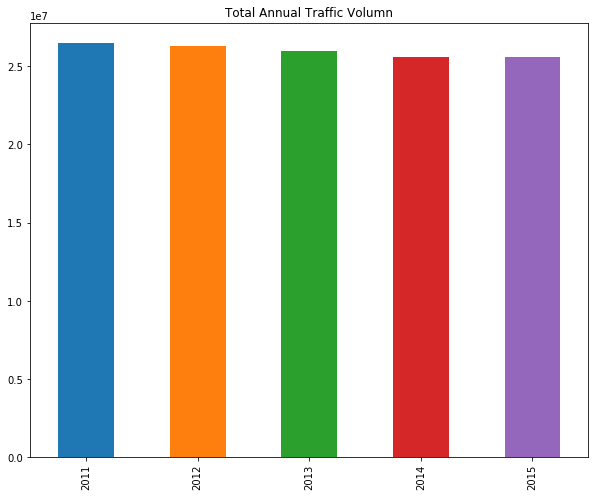

In [20]:
totalVolumn[['2011','2012','2013','2014','2015']].plot(kind='bar', width = 0.5, title = "Total Annual Traffic Volumn", figsize = (10, 8))
#totalVolumn[['2011','2012','2013','2014','2015']].plot(figsize = (10, 8))

In [7]:
from collections import defaultdict
volumnData = data.groupby(['Primary Street']).sum().sort_values('2011', ascending = False)
volumnData

,2011,2012,2013,2014,2015
Primary Street,,,,,
MIRA MESA BLVD,851900,846800,833600,819800,794300
BALBOA AVE,703700,682200,682200,631300,657500
GENESEE AVE,540100,529200,534600,519900,536300
UNIVERSITY AVE,498900,491900,475400,469800,470200
CLAIREMONT MESA BLVD,486600,486500,486800,482700,472900
FRIARS RD,477200,475200,460300,452000,461800
EL CAJON BLVD,458200,459000,450000,433100,421100
MIRAMAR RD,427700,421900,436200,424400,423400
BLACK MOUNTAIN RD,409800,402200,396500,386300,384100


In [42]:
volumnData = pd.read_csv('volumn.csv')

In [41]:
volumnData.to_csv('volumn.csv')

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
import numpy as np
from collections import defaultdict

volumnDict = defaultdict(int)
streetList = []
volumnList = [[],[],[],[],[]]
for index, row in volumnData.iterrows():
    volumnDict[index] = row['2015']
    streetList.append(index)
    volumnList[0].append(row['2011'])
    volumnList[1].append(row['2012'])
    volumnList[2].append(row['2013'])
    volumnList[3].append(row['2014'])
    volumnList[4].append(row['2015'])

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

alice_coloring = np.array(Image.open("001.jpg"))
wc = WordCloud(font_path = 'Control Panel/Appearance and Personalization/Gill Sans.tff', background_color="white", max_words=2000, mask=alice_coloring,
               max_font_size=500, random_state=42, width = 1500, height = 800)

# generate word cloud
wc.generate_from_frequencies(volumnDict)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.title('Traffic Volumn in San Diego')
plt.show()

In [ ]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

#Convert all the required text into a single string here 
#and store them in word_string

#you can specify fonts, stopwords, background color and other options
alice_coloring = np.array(Image.open("map1.jpg"))
wordcloud = WordCloud(    
#                         font_path ='System/Library/Fonts/HiraKakuInterface-W2.otf',
                          font_path = 'Library/Fonts/Impact.ttf',
                            stopwords=None,
#                           max_font_size=100, 
#                           min_font_size=40,
                          max_words = 200,
                          background_color="white",
                          colormap="tab10",
                          width=2000,
                          height=2000,
                          mask=alice_coloring
                         ).generate_from_frequencies(words)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

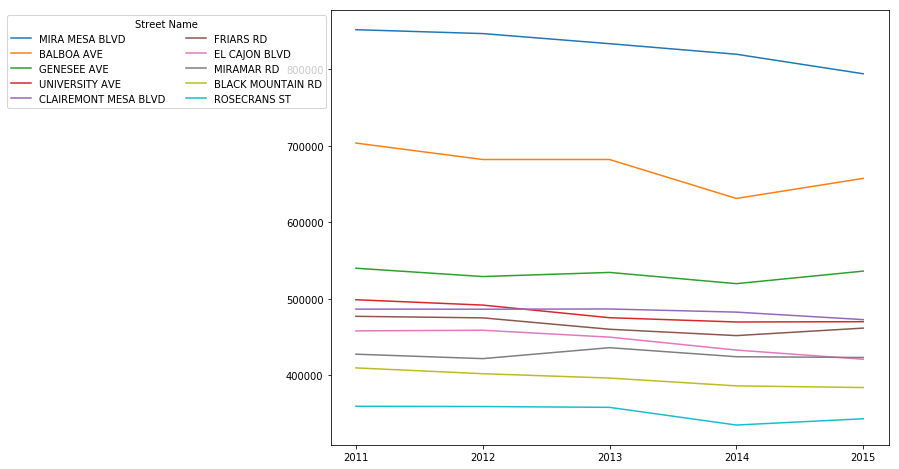

In [104]:
year = [2011, 2012, 2013, 2014, 2015]

plt.figure(figsize=(10,8))
# Plot the lines y=x**n for n=1..4.
for n in range(10):
    plt.plot(year, np.asarray(volumnList).T[n], label=streetList[n])
plt.legend(bbox_to_anchor=[0, 1],
           ncol=2, shadow=False, title="Street Name", fancybox=True)
ax.get_legend().get_title().set_color("red")
plt.xticks([2011,2012,2013,2014,2015])
plt.show()

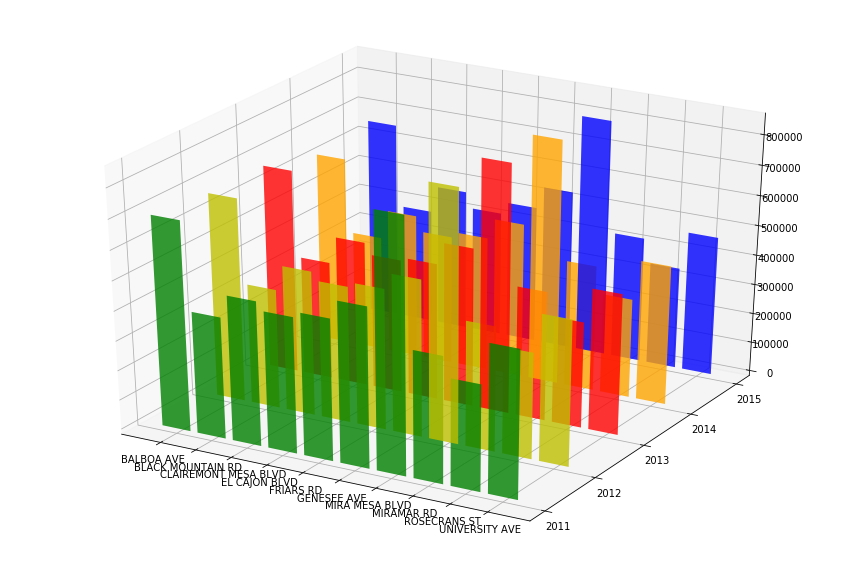

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
for i, c in enumerate(zip(['g', 'y', 'r', 'orange', 'b'], [2011, 2012, 2013, 2014, 2015])):
    xs = streetList[:10]
    ys = volumnList[i][:10]

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c[0]] * len(xs)
    #cs[0] = 'c'
    ax.bar(xs, ys, zs=c[1], zdir='y', color=cs, alpha=0.8)
#ax.set_xlabel('Street')
#ax.set_ylabel('Year')
#ax.set_zlabel('Traffic Volumn')
ax.set_yticks([2011, 2012, 2013, 2014, 2015])
#ax.set_zticks([2011, 2012, 2013, 2014, 2015])
plt.show()

In [52]:
np.mean(volumnList[4][:10])

496490.0